<a href="https://colab.research.google.com/github/Harsha-m416/Stanford_Dogs_Data/blob/main/Mulinti_DM_Programming_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings

from PIL import Image
from skimage.color import rgb2gray
import xml.etree.ElementTree as ET
from skimage import io, exposure, filters

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVR

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold


import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

In [ ]:
image_dir = "/content/drive/MyDrive/data_mining/mulinti_images"
annotation_dir = "/content/drive/MyDrive/data_mining/mulinti_annotation"

In [ ]:
class_names = ['Basenji','Airedale','Brittany_spaniel','Bouvier_des_flandres']

In [ ]:
class_names

['Basenji', 'Airedale', 'Brittany_spaniel', 'Bouvier_des_flandres']

In [ ]:
class_paths = []
for i in os.listdir(image_dir):
  for j in class_names:
    if j.lower() in i.lower():
      class_paths.append(i)

In [ ]:
class_paths

['n02096051-Airedale',
 'n02101388-Brittany_spaniel',
 'n02106382-Bouvier_des_Flandres',
 'n02110806-basenji']

## Edge histogram Data

In [ ]:
new_dir = "/content/drive/MyDrive/data_mining/processed"

In [ ]:
df = pd.DataFrame(columns = list(range(0,36))+['class'])
for class_ in class_paths:
  class_path = os.path.join(new_dir,class_)
  for filename in os.listdir(class_path):
    img = io.imread(os.path.join(class_path,filename))
    gray_sacle = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_sacle),
                    filters.sobel_v(gray_sacle))
    hist,bins = exposure.histogram(angle_sobel,nbins=36)
    for i in class_names:
      if i.lower() in class_.lower():
        break
    df.loc[len(df)] = list(hist)+[class_names.index(i)]




In [ ]:
df.to_csv("/content/drive/MyDrive/ajas/edge_hist_data.csv")

## Split into Test Train

In [ ]:
X = np.array(df[df.columns[:-1]])
y = np.array(df['class'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Scale

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
scalled_x_train = scaler.transform(X_train)
scalled_x_test = scaler.transform(X_test)

## KNN K-fold

In [ ]:
mean_val_errors_std = []
mean_val_errors_strat = []
mean_train_errors_std = []
mean_train_errors_strat = []
k_values = [1, 3, 5, 7, 10, 20]
for k in k_values:
    # Standard 5-fold cross-validation
    kf = KFold(n_splits=5)
    knn1 = KNeighborsClassifier(n_neighbors=k)
    val_scores_std = cross_val_score(knn1, scalled_x_train, y_train, cv=kf)
    train_scores_std = knn1.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_val_errors_std.append(1 - np.mean(val_scores_std))
    mean_train_errors_std.append(1 - train_scores_std)
    print(f"Standard 5-fold CV, k={k}: Train accuracy: {train_scores_std},Val accuracy: {np.mean(val_scores_std)}")
    knn2 = KNeighborsClassifier(n_neighbors=k)
    skf = StratifiedKFold(n_splits=5)
    val_scores_strat = cross_val_score(knn2, scalled_x_train, y_train, cv=skf)
    train_scores_strat = knn2.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_val_errors_strat.append(1 - np.mean(val_scores_strat))
    mean_train_errors_strat.append(1 - train_scores_strat)
    print(f"Stratified 5-fold CV, k={k}: Train accuracy: {train_scores_strat},Val accuracy {np.mean(val_scores_strat)}")


Standard 5-fold CV, k=1: Train accuracy: 0.9982456140350877,Val accuracy: 0.30350877192982456
Stratified 5-fold CV, k=1: Train accuracy: 0.9982456140350877,Val accuracy 0.30701754385964913
Standard 5-fold CV, k=3: Train accuracy: 0.6192982456140351,Val accuracy: 0.3140350877192982
Stratified 5-fold CV, k=3: Train accuracy: 0.6192982456140351,Val accuracy 0.30877192982456136
Standard 5-fold CV, k=5: Train accuracy: 0.5456140350877193,Val accuracy: 0.35438596491228064
Stratified 5-fold CV, k=5: Train accuracy: 0.5456140350877193,Val accuracy 0.34210526315789475
Standard 5-fold CV, k=7: Train accuracy: 0.5298245614035088,Val accuracy: 0.35614035087719303
Stratified 5-fold CV, k=7: Train accuracy: 0.5298245614035088,Val accuracy 0.3508771929824561
Standard 5-fold CV, k=10: Train accuracy: 0.49298245614035086,Val accuracy: 0.3456140350877193
Stratified 5-fold CV, k=10: Train accuracy: 0.49298245614035086,Val accuracy 0.34385964912280703
Standard 5-fold CV, k=20: Train accuracy: 0.4473684210

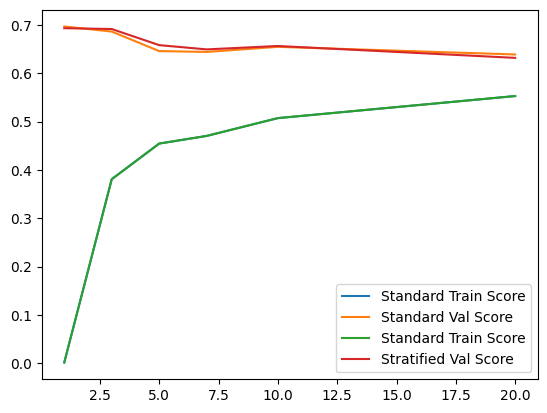

In [ ]:
fig,ax = plt.subplots()
ax.plot(k_values,mean_train_errors_std,label="Standard Train Score")
ax.plot(k_values,mean_val_errors_std,label="Standard Val Score")
ax.plot(k_values,mean_train_errors_strat,label="Standard Train Score")
ax.plot(k_values,mean_val_errors_strat,label="Stratified Val Score")
ax.legend()
plt.show()

In [ ]:
print(f"Lowest Standrad Training mean Error is {np.min(mean_train_errors_std)} at  k =  {k_values[np.argmin(mean_train_errors_std)]}")
print(f"Lowest Standrad Val mean Error is {np.min(mean_val_errors_std)}  at  k = {k_values[np.argmin(mean_val_errors_std)]}")
print(f"Lowest Stratified Training mean Error is {np.min(mean_train_errors_strat)} at k = {k_values[np.argmin(mean_train_errors_strat)]}")
print(f"Lowest Stratified Val mean Error is {np.min(mean_val_errors_strat)} at k = {k_values[np.argmin(mean_val_errors_strat)]}")

Lowest Standrad Training mean Error is 0.0017543859649122862 at  k =  1
Lowest Standrad Val mean Error is 0.6385964912280702  at  k = 20
Lowest Stratified Training mean Error is 0.0017543859649122862 at k = 1
Lowest Stratified Val mean Error is 0.631578947368421 at k = 20


Overfiting at K =1 as Train error is low and val error is high.

As Stratified Val error is lowest at k = 20

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(scalled_x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
error = 1- knn.score(scalled_x_test,y_test)

In [ ]:
error

0.6783216783216783

Test Score = 0.6783216783216783

## Performance Comparison

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
classifiers = {
    'Support Vector Machine': LinearSVR(),
    'Neural Network': MLPClassifier(hidden_layer_sizes = (10, 10, 10, )),
    'Ada Boost': AdaBoostClassifier()
}


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_scores_all = []
for clf_name, clf in classifiers.items():
    val_classifier_score = []
    for fold, (start_train_index, val_index) in enumerate(skf.split(scalled_x_train, y_train)):
        X_start_train, X_val = scalled_x_train[start_train_index], scalled_x_train[val_index]
        y_start_train, y_val = y_train[start_train_index], y_train[val_index]

        clf.fit(X_start_train, y_start_train)

        y_pred = clf.predict(X_val)
        if clf_name == "Support Vector Machine":
          y_pred = np.round(y_pred)

        val_k_fold_score= accuracy_score(y_val,y_pred)
        val_classifier_score.append(val_k_fold_score)

    val_scores_all.append((clf_name,val_classifier_score))


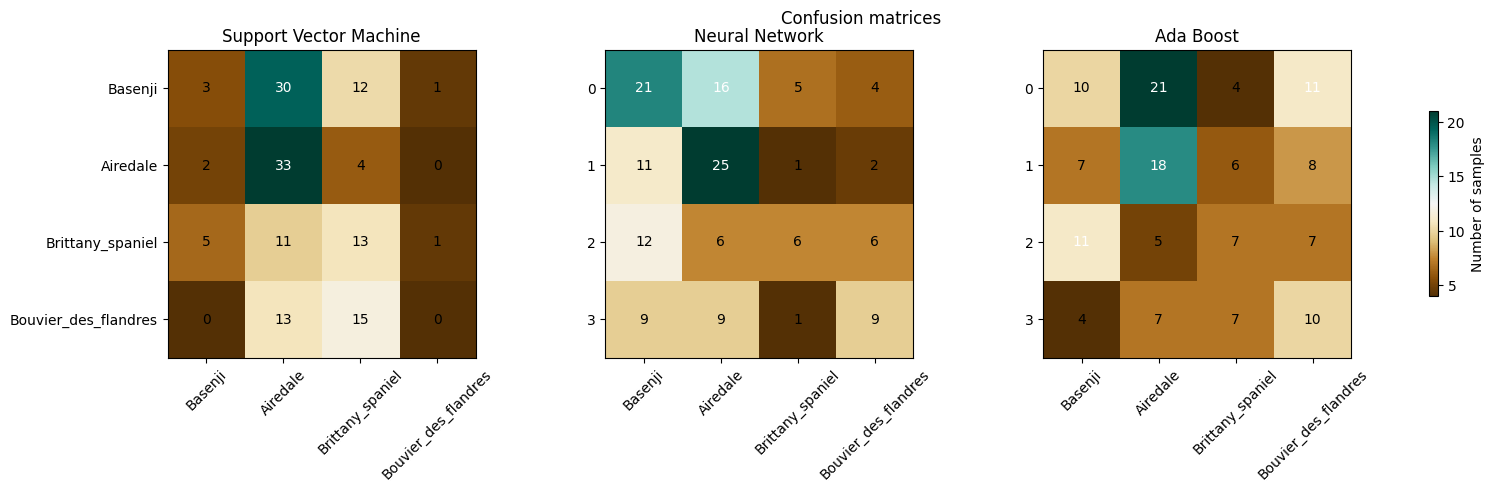

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,4))
for i, (clf_name,clf) in  enumerate(classifiers.items()):
  y_pred = clf.predict(scalled_x_test)
  if clf_name =="Support Vector Machine":
    y_pred = np.round(y_pred)
  cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
  ax = axes[i]
  im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.BrBG)
  ax.set_xticks(np.arange(len(class_names)))
  ax.set_yticks(np.arange(len(class_names)))
  ax.set_xticklabels(class_names,rotation=45)
  if i==0:
    ax.set_yticklabels(class_names)
  ax.set_title(f'{clf_name}')

  for i in range(len(class_names)):
      for j in range(len(class_names)):
          ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
cbar.ax.set_ylabel('Number of samples')

fig.suptitle(f'Confusion matrices')

plt.show()

7)i) Based on the Confusion matrix visualization neural netwrok as the it has best diagonal values for all class, even though the SVM have max values for one class but for other classes the values are low.

In [ ]:
for clf_name, scores in val_scores_all:
  print(f"{clf_name} Mean Val accuracy accross K folds {np.mean(scores)}")

Support Vector Machine Mean Val accuracy accross K folds 0.3052631578947368
Neural Network Mean Val accuracy accross K folds 0.3368421052631579
Ada Boost Mean Val accuracy accross K folds 0.3140350877192982


7)ii) neural network is best method based on the mean validation accuracies

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
scores = []
f_scores = []
for clf_name, clf in classifiers.items():
  clf.fit(scalled_x_train,y_train)
  y_pred = clf.predict(scalled_x_test)
  if clf_name == "Support Vector Machine":
    y_pred = np.round(y_pred)
  score = accuracy_score(y_test,y_pred)
  f1_micro = f1_score(y_test, y_pred, average='micro')

  f1_macro = f1_score(y_test, y_pred, average='macro')

  f1_weighted = f1_score(y_test, y_pred, average='weighted')

  scores.append(score)
  f_scores.append(np.mean([f1_micro,f1_macro,f1_weighted]))





In [ ]:
for clf_name, acc, f1 in zip(classifiers,scores,f_scores):
  print(f"{clf_name} has Test accuracy  {acc} and F1 score {f1}")


Support Vector Machine has Test accuracy  0.32867132867132864 and F1 score 0.2807243925664978
Neural Network has Test accuracy  0.34965034965034963 and F1 score 0.33722237901005947
Ada Boost has Test accuracy  0.32167832167832167 and F1 score 0.31471541560104316


7)iii)&iv) Neural Network is best in both Test accuracy and F1 score